In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import time

In [3]:
from rxrmask.core import (
    Atom,
    Structure,
    FormFactorLocalDB,
    ParametersContainer,
    FormFactorModel,
    FormFactorVacancy,
    create_compound,
)
from rxrmask.utils import (
    plot_reflectivity,
    plot_energy_scan,
    plot_density_profile,
    get_density_profile_from_element_data,
    plot_density_profile_atoms_layers,
)
from rxrmask.backends import (
    PRReflectivityBackend,
    PRParallelReflectivityBackend,
)

In [4]:
mn_ff = FormFactorLocalDB(element="Mn", is_magnetic=False)
o_ff = FormFactorLocalDB(element="O", is_magnetic=False)
sr_ff = FormFactorLocalDB(element="Sr", is_magnetic=False)
ti_ff = FormFactorLocalDB(element="Ti", is_magnetic=False)
c_ff = FormFactorLocalDB(element="C", is_magnetic=False)
la_ff = FormFactorLocalDB(element="La", is_magnetic=False)
la_atom = Atom(
    Z=57,
    name="La",
    ff=la_ff,
)
mn_atom = Atom(
    Z=25,
    name="Mn",
    ff=mn_ff,
)
o_atom = Atom(
    Z=8,
    name="O",
    ff=o_ff,
)
sr_atom = Atom(
    Z=38,
    name="Sr",
    ff=sr_ff,
)
ti_atom = Atom(
    Z=22,
    name="Ti",
    ff=ti_ff,
)
c_atom = Atom(
    Z=6,
    name="C",
    ff=c_ff,
)
x1_atom = Atom(
    Z=0,
    name="X1",
    ff=c_ff,
)
x2_atom = Atom(
    Z=0,
    name="X2",
    ff=c_ff,
)

In [29]:
parameters_container = ParametersContainer()
comp_SrTiO3 = create_compound(
    parameters_container=parameters_container,
    name="SrTiO3",
    formula="Sr:1,Ti:1,O:3",
    thickness=50.0,
    density=5.12,
    atoms=[sr_atom, ti_atom, o_atom],
    roughness=5.0,
    prev_roughness=0.0,
    linked_prev_roughness=False,
)
comp_LaMnO3 = create_compound(
    parameters_container=parameters_container,
    name="LaMnO3",
    formula="La:1,Mn:1,O:3",
    thickness=10.0,
    density=6.52,
    atoms=[la_atom, mn_atom, o_atom],
    roughness=4.0,
    prev_roughness=0.0,
    linked_prev_roughness=True,
)


struc = Structure(name=f"Test Structure", n_compounds=2, params_container=parameters_container)
struc.add_compound(0, comp_SrTiO3)
struc.add_compound(1, comp_LaMnO3)
struc.validate_compounds()
struc.create_layers(step=0.1)


comp_LaMnO3.compound_details[0].molar_density.independent = True
comp_LaMnO3.compound_details[0].molar_density.set(0.1)

comp_LaMnO3.compound_details[0].thickness.independent = True
comp_LaMnO3.compound_details[0].thickness.set(15.0)

comp_LaMnO3.compound_details[0].prev_roughness.independent = True
comp_LaMnO3.compound_details[0].prev_roughness.set(1.0)

struc.update_layers()

print(comp_LaMnO3.compound_details[0].prev_roughness)


DependentParameter(value=1.0, id=29, name='LaMnO3-La-prev_roughness', lower=0.0, upper=0.2, fit=False, independent=True, depends_on=DependentParameter(value=5.0, id=8, name='SrTiO3-Sr-roughness', lower=4.0, upper=6.0, fit=False, independent=False, depends_on=Parameter(value=5.0, id=3, name='SrTiO3-roughness', lower=4.0, upper=6.0, fit=False), update_func=None), update_func=None)


In [30]:
struc.print_details()

Structure: Test Structure
Number of compounds: 2
Number of layers: 750
Compound 0: SrTiO3
  Thickness: Parameter(value=50.0, id=0, name='SrTiO3-thickness', lower=40.0, upper=60.0, fit=False) Angstrom
  Density: Parameter(value=5.12, id=1, name='SrTiO3-density', lower=4.096, upper=6.144, fit=False) g/cm³
  Magnetic Density: Parameter(value=0.0, id=2, name='SrTiO3-magnetic_density', lower=0.0, upper=0.2, fit=False) mol/cm³
  Roughness: Parameter(value=5.0, id=3, name='SrTiO3-roughness', lower=4.0, upper=6.0, fit=False) Angstrom
  Previous Roughness: DependentParameter(value=0.0, id=4, name='SrTiO3-prev_roughness', lower=0.0, upper=0.2, fit=False, independent=True, depends_on=None, update_func=None) Angstrom
Compound 1: LaMnO3
  Thickness: Parameter(value=10.0, id=20, name='LaMnO3-thickness', lower=8.0, upper=12.0, fit=False) Angstrom
  Density: Parameter(value=6.52, id=21, name='LaMnO3-density', lower=5.216, upper=7.823999999999999, fit=False) g/cm³
  Magnetic Density: Parameter(value=0.

In [27]:
comp_SrTiO3.print_details()
comp_LaMnO3.print_details()

Compound: SrTiO3
  Formula: Sr:1,Ti:1,O:3
  Thickness: 50.0 Angstrom
  Density: 5.12 g/cm³
  Magnetic Density: 0.0 g/cm³
  Roughness: 5.0 Angstrom
  Previous Roughness: 0.0 Angstrom
  Linked Previous Roughness: False
  Magnetic: No
  Detail - 0: Sr - 1 50.0 Angstrom 5.0 Angstrom 0.0 Angstrom 0.027899140248760067 mol/cm³ 0.0 mol/cm³
  Detail - 1: Ti - 1 50.0 Angstrom 5.0 Angstrom 0.0 Angstrom 0.027899140248760067 mol/cm³ 0.0 mol/cm³
  Detail - 2: O - 3 50.0 Angstrom 5.0 Angstrom 0.0 Angstrom 0.0836974207462802 mol/cm³ 0.0 mol/cm³
Compound: LaMnO3
  Formula: La:1,Mn:1,O:3
  Thickness: 10.0 Angstrom
  Density: 6.52 g/cm³
  Magnetic Density: 0.0 g/cm³
  Roughness: 4.0 Angstrom
  Previous Roughness: 5.0 Angstrom
  Linked Previous Roughness: True
  Magnetic: No
  Detail - 0: La - 1 15.0 Angstrom 4.0 Angstrom 1.0 Angstrom 0.91 mol/cm³ 0.0 mol/cm³
  Detail - 1: Mn - 1 10.0 Angstrom 4.0 Angstrom 5.0 Angstrom 0.026959784024012397 mol/cm³ 0.0 mol/cm³
  Detail - 2: O - 3 10.0 Angstrom 4.0 Angstrom

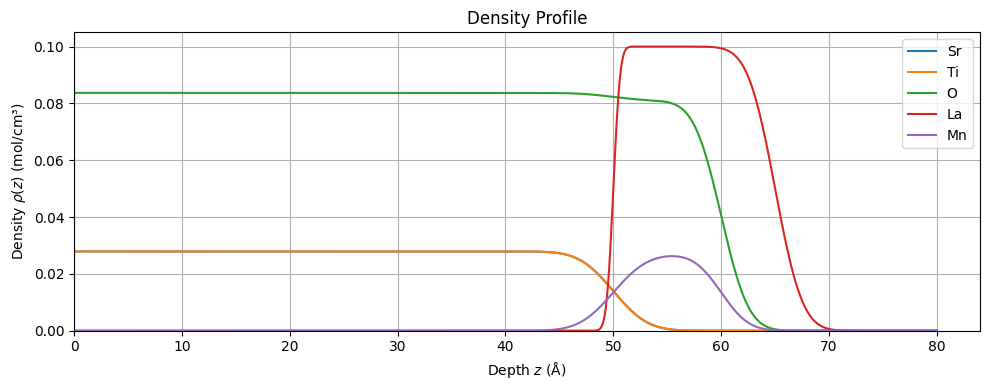

In [31]:
plot_density_profile_atoms_layers(struc.atoms_layers)